<h1 style = "text-align:center">GESTIÓN INTELIGENTE DE DATOS EN TIEMPO REAL </h1>

<a href="https://github.com/ricardordf">

  <iframe src="https://drive.google.com/file/d/1ziQHTw9DWpDT1feRfcPhYUl24TYNEXQI/preview" width="135" height="135" allow="autoplay" style="float:left; vertical-alig:middle"></iframe>
  <iframe src="https://drive.google.com/file/d/1B6NtQfzZTgPuVoFWOl1T0i914jAqpHKC/preview" alt="UE" width="135" height="135" style="float:right;vertical-alig:middle"></iframe>
</a>

<a href="https://github.com/ricardordf/data_analysis">
  <br>
  <h2 style = "text-align:center">Actividad. Análisis de datos</h2>
  <br><br><br>
</a>


# Ejercicio 1: Análisis de datos

Este documento proporciona un análisis de los procesos de producción en una planta industrial, específicamente enfocado en las líneas de corte de papel filtrante. A través de la evaluación estadística, la correlación entre variables operativas, y la identificación de anomalías, se busca optimizar la eficiencia y efectividad de estas líneas. El objetivo final es ofrecer recomendaciones basadas en datos para mejorar la productividad y la calidad del proceso de corte en las líneas 400 y 500.
Primero, se realizará un análisis general para conocer los datos y posteriormente nos centraremos en las líneas mencionadas con anterioridad.

## Análisis de datos general

Se nos presenta la siguiente información como ayuda para el ejercicio sobre algunas de las variables que nos vamos a encontrar.
1.	LOCATION_ID: Identificador único para la localización dentro de las distintas plantas de producción.
2.	Line: Línea de producción (para un mismo producto puede disponerse de varias líneas para aumentar el volumen de producción).
3.	Station: Estación física de trabajo diseñada para realizar uno o varios procesos productivos (una estación puede contar con varios puestos de trabajo). La etiqueta indica un tipo de estación no una unidad física.
4.	Index: Indica el número de estaciones del mismo tipo que hay dentro de la línea. Ej. Línea: 400, Station:20, Index:1,2 (si hay dos estaciones de tipo 20 dentro de la línea 400).
5.	Fu: Function Unit. Separaciones funcionales dentro de la estación e index. Cuando dentro de una estación se realizan dos funciones distintas.
6.	WP: Work Position. Posición donde se pueden realizar uno o más procesos, dentro de una function unit (ej. envasar y estampar).
7.	TP: Tool Position. Posición de la herramienta dentro del WP. Varia cuando tienes varias herramientas involucradas en la misma WP.
8.	RESULT_DATE: Fecha, hora y franja horaria.
9.	UNIQUEPART_ID: **Identificador único** de cada una de las piezas producidas.
10.	Cut Amplitude: Amplitud del corte realizado (micrómetros).
11.	Cut Energy: Energía utilizada en el corte (J).
12.	Cut Frecuency: Frecuencia ultrasonido utilizada para realizar el corte (Hz).
13.	Cut Power: Potencia de corte (W).
14.	Cut WeldTime: Tiempo necesario para realizar el corte del papel (ms).
15.	Grammage: Gramaje del papel de lija (g/m2).
16.	Humidity: Humedad del entorno (%).
17.	Temperature: Grados del entorno.

Importar librerias con las que trabajaremos

In [122]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

Cargar fichero con los datos a utilizar

In [123]:
# Creamos un nuevo dataframe de pandas con los datos del fichero CSV
df = pd.read_csv("DatosPreparados.csv",delimiter=';', low_memory=False)

Analizamos la cabera de nuestro dataframe, se observa que existen valores vacíos (NaN)

In [124]:
df.head(5)

,LOCATION_ID,Line,Station,Index,Fu,WP,TP,RESULT_DATE,UNIQUEPART_ID,Cavity_5_3,...,MaxJoiningDistance,TC Amplitude,TC Energy,TC Power,TC ProgNo,TC RPNAfter,TC WeldTime,Temperature,TriggerForce,TriggerPosition
0,00000000000500100001200010001,5,10,1,2,1,1,"27/01/23 00:00:41,663736000 EUROPE/BERLIN",1457436058501230126235323,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000500100001200010001,5,10,1,2,1,1,"27/01/23 00:00:56,960608000 EUROPE/BERLIN",1457436058501230126235401,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000500100001100040001,5,10,1,1,4,1,"27/01/23 00:01:22,261133000 EUROPE/BERLIN",1457436058501230126235915,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000500100001200010001,5,10,1,2,1,1,"27/01/23 00:05:32,041662000 EUROPE/BERLIN",1457436058501230126235915,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000000500100001209210001,5,10,1,2,921,1,"27/01/23 00:02:14,340757000 EUROPE/BERLIN",1457436058501230126235915,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores unicos de las variables (busqueda de variables categóricas)

In [125]:
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique.to_string())

                      Variable  DistinctCount
0                  LOCATION_ID             40
1                         Line              4
2                      Station              5
3                        Index              1
4                           Fu              4
5                           WP             10
6                           TP              1
7                  RESULT_DATE         121064
8                UNIQUEPART_ID          29167
9                   Cavity_5_3              4
10                     HU_Code              4
11                    Mold_5_3              1
12                 NIORejected              1
13                      WPC_Id            110
14               plcIdentifier           9435
15            serverIdentifier           9492
16  AdaptorPlateTempAEndPhase1            220
17  AdaptorPlateTempAEndPhase2            176
18  AdaptorPlateTempAEndPhase3            251
19      AdaptorPlateTempAStart            277
20  AdaptorPlateTempBEndPhase1    

El método describe() proporciona un resumen estadístico rápido de las características de un conjunto de datos, incluyendo medidas como la media, desviación estándar, mínimo, máximo y los cuartiles.

In [126]:
df.describe()

,Line,Station,Index,Fu,WP,TP,Cavity_5_3,HU_Code,Mold_5_3,WPC_Id,...,MaxJoiningDistance,TC Amplitude,TC Energy,TC Power,TC ProgNo,TC RPNAfter,TC WeldTime,Temperature,TriggerForce,TriggerPosition
count,122117.000000,122117.000000,122117.0,122117.000000,122117.000000,122117.0,6044.000000,3.327000e+03,6044.0,102348.000000,...,18565.000000,3371.000000,3371.000000,3371.000000,3371.000000,3371.00000,3371.000000,19619.000000,18565.000000,18565.000000
mean,78.320971,14.890179,1.0,2.311832,81.637520,1.0,2.503309,2.056205e+08,1.0,583.497938,...,1.441583,86.603085,100.706022,458.108870,2.909522,786.68496,431.895580,22.497570,499.575595,201.789074
std,169.515975,7.931273,0.0,0.997259,240.889744,0.0,1.120044,1.664376e+03,0.0,332.945543,...,0.042949,11.284938,13.999996,60.965056,1.483580,109.46918,62.753995,0.320588,1.359935,0.204232
min,4.000000,10.000000,1.0,1.000000,1.000000,1.0,1.000000,2.056177e+08,1.0,101.000000,...,1.331600,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,21.810050,497.005300,201.213300
25%,4.000000,10.000000,1.0,1.000000,2.000000,1.0,1.750000,2.056191e+08,1.0,210.000000,...,1.409200,88.000000,100.000000,459.000000,2.000000,777.00000,417.000000,22.283090,498.542500,201.671700
50%,5.000000,10.000000,1.0,2.000000,21.000000,1.0,3.000000,2.056218e+08,1.0,806.000000,...,1.436500,88.000000,100.000000,468.000000,2.000000,796.00000,430.000000,22.458570,499.477400,201.854500
75%,5.000000,20.000000,1.0,3.000000,24.000000,1.0,4.000000,2.056218e+08,1.0,825.000000,...,1.471400,89.000000,110.000000,474.000000,5.000000,825.00000,460.000000,22.623370,500.529800,201.949300
max,500.000000,40.000000,1.0,4.000000,921.000000,1.0,4.000000,2.056225e+08,1.0,925.000000,...,1.761700,91.000000,110.000000,492.000000,6.000000,911.00000,537.000000,24.031800,502.998200,202.161400


Comprobamos si tenemos valores nulos "vacíos", el siguiente código simplemente lista el número total de valores nulos por cada variable del dataframe.

In [127]:
var = df.isnull().sum()
print(var.to_string())

LOCATION_ID                        0
Line                               0
Station                            0
Index                              0
Fu                                 0
WP                                 0
TP                                 0
RESULT_DATE                        0
UNIQUEPART_ID                      0
Cavity_5_3                    116073
HU_Code                       118790
Mold_5_3                      116073
NIORejected                   122056
WPC_Id                         19769
plcIdentifier                  94198
serverIdentifier               94198
AdaptorPlateTempAEndPhase1    103552
AdaptorPlateTempAEndPhase2    103552
AdaptorPlateTempAEndPhase3    103552
AdaptorPlateTempAStart        103552
AdaptorPlateTempBEndPhase1    103552
AdaptorPlateTempBEndPhase2    103552
AdaptorPlateTempBEndPhase3    103552
AdaptorPlateTempBStart        103552
AdaptorPlateTempCEndPhase1    103552
AdaptorPlateTempCEndPhase2    103552
AdaptorPlateTempCEndPhase3    103552
A

Como los valores nulos y vacíos no nos aportan nada, procedemos a quitarlos de nuestro dataframe, creamos uno nuevo llamado dfFiltered

In [128]:
# Definimos las columnas que queremos filtrar
cols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']

# Reemplazamos cadenas vacías con NaN y eliminamos filas con NaN en las columnas de corte
dfFiltered = df[cols].replace('', np.nan).dropna(subset=cols)
dfFiltered

,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
93459,122.0,320.0,20081.0,3522.0,383.0,0.0000,35.56017,23.40465
93460,102.0,320.0,20078.0,2730.0,283.0,0.0000,35.52355,23.44279
93461,123.0,320.0,20106.0,3315.0,274.0,0.0000,35.52660,23.41533
93462,107.0,320.0,20080.0,2844.0,280.0,0.0000,35.48082,23.39702
93463,101.0,320.0,20078.0,2763.0,285.0,0.0000,35.46556,23.41228
...,...,...,...,...,...,...,...,...
113079,121.0,330.0,20045.0,3760.0,281.0,520.2471,33.43913,22.58217
113080,115.0,330.0,20034.0,3308.0,282.0,520.2471,33.47270,22.57149
113081,118.0,330.0,20039.0,3548.0,274.0,526.8630,33.44524,22.56996
113082,123.0,330.0,20059.0,4345.0,414.0,526.8020,33.47576,22.58675


Este código extrae las columnas del DataFrame dfFiltered que contienen datos numéricos. Este paso nos sirve para identificar las variables que pueden ser utilizadas directamente en análisis estadísticos y modelados.

In [129]:
#Datos categoricos  ### CUIDADO!! Puede inducir a errores
dfFiltered.select_dtypes('object').columns

#Datos numericos  ### CUIDADO!! Puede inducir a errores
dfFiltered.select_dtypes('number').columns

Index(['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power',
       'Cut WeldTime', 'Grammage', 'Humidity', 'Temperature'],
      dtype='object')

Este código se emplea para eliminar valores atípicos o outliers en las columnas especificadas de dfFiltered, que están relacionadas con el proceso de corte. Utilizando el método del rango intercuartílico (IQR), se identifican y excluyen los valores extremos, asegurando así la fiabilidad y consistencia de los análisis subsiguientes sobre los datos de producción.

In [130]:
#Eliminamos outliers (valores anomalos)
cols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime'] # one or more

Q1 = dfFiltered[cols].quantile(0.25)
Q3 = dfFiltered[cols].quantile(0.75)
IQR = Q3 - Q1

df_withoutOutliers = dfFiltered[~((dfFiltered[cols] < (Q1 - 1.5 * IQR)) |(dfFiltered[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_withoutOutliers

,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
93459,122.0,320.0,20081.0,3522.0,383.0,0.0000,35.56017,23.40465
93460,102.0,320.0,20078.0,2730.0,283.0,0.0000,35.52355,23.44279
93461,123.0,320.0,20106.0,3315.0,274.0,0.0000,35.52660,23.41533
93462,107.0,320.0,20080.0,2844.0,280.0,0.0000,35.48082,23.39702
93463,101.0,320.0,20078.0,2763.0,285.0,0.0000,35.46556,23.41228
...,...,...,...,...,...,...,...,...
113079,121.0,330.0,20045.0,3760.0,281.0,520.2471,33.43913,22.58217
113080,115.0,330.0,20034.0,3308.0,282.0,520.2471,33.47270,22.57149
113081,118.0,330.0,20039.0,3548.0,274.0,526.8630,33.44524,22.56996
113082,123.0,330.0,20059.0,4345.0,414.0,526.8020,33.47576,22.58675


Este código genera gráficos de caja para las columnas numéricas relacionadas con el proceso de corte, permitiendo visualizar distribuciones, medias y detectar posibles valores atípicos. Es útil para evaluar rápidamente la variabilidad y tendencias centrales de los datos de producción.
Se genera los gráficos de caja para el dataframe con los valores anómalos y sin ellos para poder compararlos.

<Axes: xlabel='Cut WeldTime'>

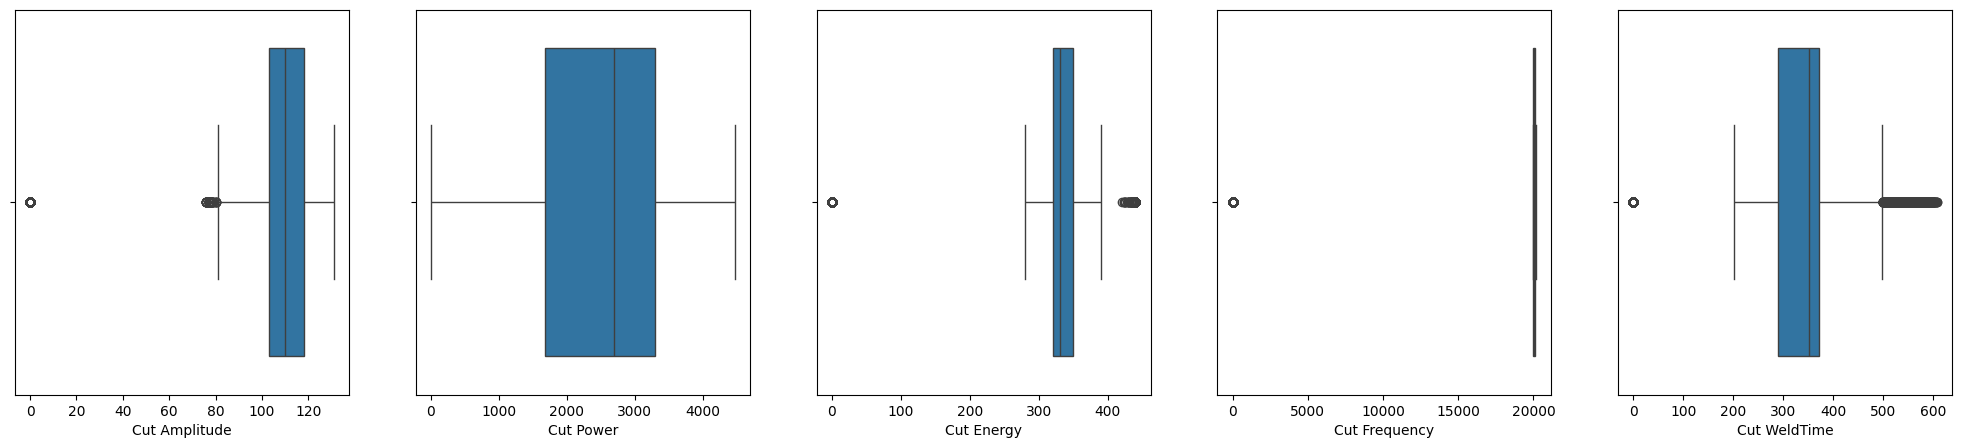

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
sns.boxplot(data=dfFiltered, x='Cut Amplitude', ax=axes[0])
sns.boxplot(data=dfFiltered, x='Cut Power', ax=axes[1])
sns.boxplot(data=dfFiltered, x='Cut Energy', ax=axes[2])
sns.boxplot(data=dfFiltered, x='Cut Frequency', ax=axes[3])
sns.boxplot(data=dfFiltered, x='Cut WeldTime', ax=axes[4])

<Axes: xlabel='Cut WeldTime'>

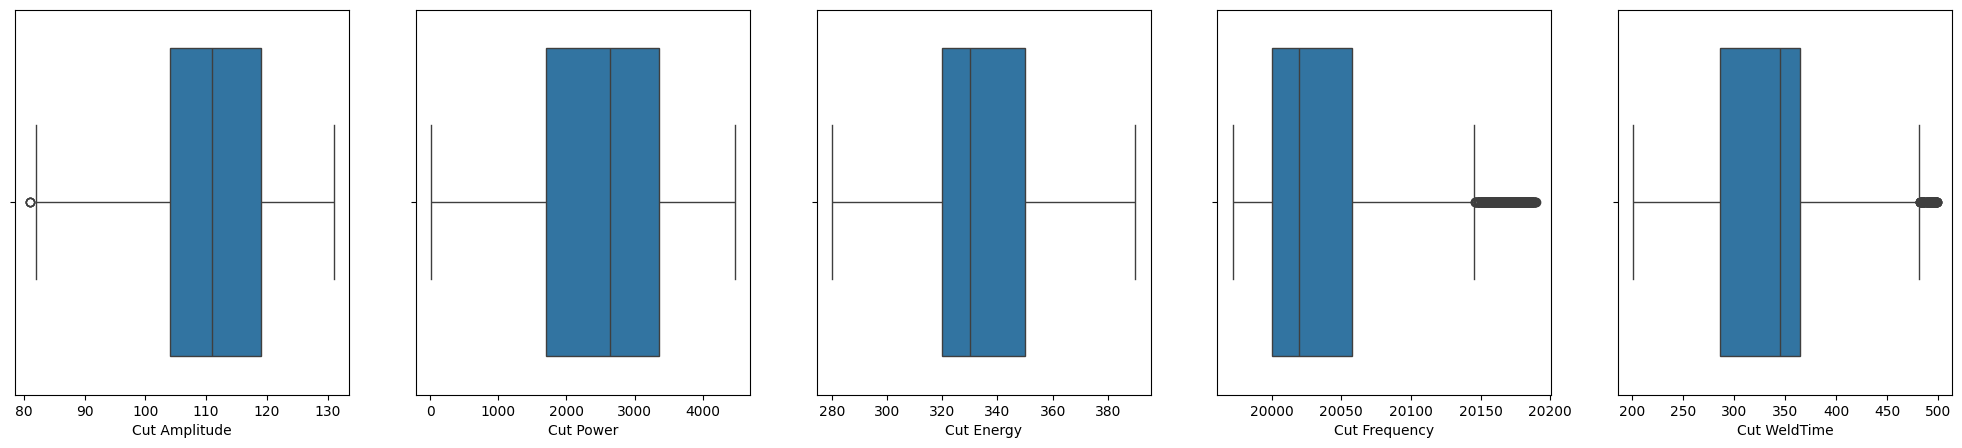

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
sns.boxplot(data=df_withoutOutliers, x='Cut Amplitude', ax=axes[0])
sns.boxplot(data=df_withoutOutliers, x='Cut Power', ax=axes[1])
sns.boxplot(data=df_withoutOutliers, x='Cut Energy', ax=axes[2])
sns.boxplot(data=df_withoutOutliers, x='Cut Frequency', ax=axes[3])
sns.boxplot(data=df_withoutOutliers, x='Cut WeldTime', ax=axes[4])

Este código calcula la matriz de correlación para las columnas numéricas especificadas en df_withoutOutliers, que incluyen medidas del proceso de corte y condiciones ambientales. La matriz es útil para identificar relaciones potenciales entre variables, lo cual es crucial para entender interacciones y dependencias en el proceso de producción.

In [133]:
# Plot correlation between numerical columns
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
df_withoutOutliers[numCols].corr()

,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
Cut Amplitude,1.000000,-0.088484,0.411653,0.899703,0.158348,-0.139214,0.119788,0.133060
Cut Energy,-0.088484,1.000000,-0.051025,-0.216703,0.708144,0.355684,-0.125524,0.101788
Cut Frequency,0.411653,-0.051025,1.000000,0.412032,0.104043,-0.539887,0.476386,0.347690
Cut Power,0.899703,-0.216703,0.412032,1.000000,0.076624,-0.043887,0.062471,0.089603
Cut WeldTime,0.158348,0.708144,0.104043,0.076624,1.000000,0.063371,0.046564,0.114621
Grammage,-0.139214,0.355684,-0.539887,-0.043887,0.063371,1.000000,-0.622789,-0.225381
Humidity,0.119788,-0.125524,0.476386,0.062471,0.046564,-0.622789,1.000000,0.013942
Temperature,0.133060,0.101788,0.347690,0.089603,0.114621,-0.225381,0.013942,1.000000


Este código crea un gráfico de dispersión entre 'Cut Amplitude' y 'Cut Power'. Este tipo de visualización es valiosa para explorar la relación entre la amplitud del corte y la potencia utilizada, permitiendo identificar patrones o correlaciones directas entre estas variables clave del proceso.

<Axes: xlabel='Cut Amplitude', ylabel='Cut Power'>

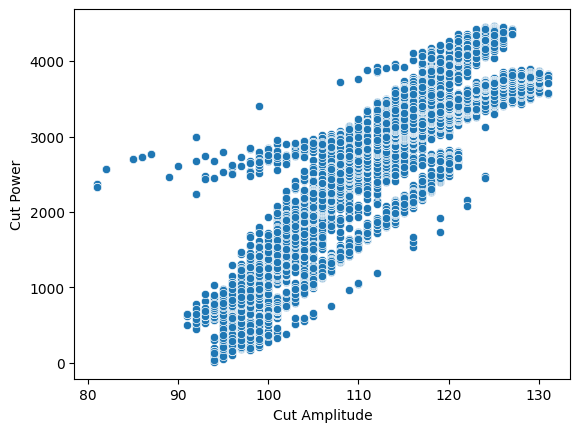

In [134]:
sns.scatterplot(data=df_withoutOutliers, x='Cut Amplitude', y='Cut Power')

El siguiente código evalúa la diversidad de los datos  contando el número de valores únicos para cada columna y presenta los resultados en un formato tabular.

In [135]:
df_unique = df_withoutOutliers.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique.to_string())

        Variable  DistinctCount
0  Cut Amplitude             48
1     Cut Energy             24
2  Cut Frequency            211
3      Cut Power           4056
4   Cut WeldTime            299
5       Grammage           2197
6       Humidity           1888
7    Temperature            818



Las líneas 400 y 500, realizan un proceso de corte de un papel filtrante por ultrasonidos para su posterior incorporación a las líneas 4 y 5 donde se suelda para terminar de ensamblar los filtros. A continuación nos centramos en dichas líneas, comenzaremos con la línea 400 y posteriormente repetiremos los mismo pasos para la 500.

# Análisis para cada una de las líneas por separado: 


1.   Matriz de correlación.
2.   Gráfica de bigotes.
1.   Valores de mínimo, máximo, media y desviación estándar sobre las variables de corte.
2.   Analisis de outliers y decisiones tomadas al respecto.










Cargamos el CSV ya limpio que se nos proporciona en un nuevo dataframe llamado "df_cleaned"

In [136]:
df_cleaned = pd.read_csv("cleanedData.csv",delimiter=';')

# Línea 400

In [137]:
#Nuevo dataframe con los datos de la linea 400
line400 =  df_cleaned.loc[df_cleaned['Line'] == 400]

## Análisis estadístico

In [138]:
#Estadísticas para la línea 400
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
statsline400 = line400[numCols].describe()
print("Estadísticas de la línea 400:")
statsline400

Estadísticas de la línea 400:


,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,114.157025,330.512146,20093.904082,2680.126722,343.281242,88.014840,36.528279,22.632008
std,10.462292,25.525026,35.363756,1054.907671,48.820022,205.105472,1.862000,0.393978
min,89.000000,302.000000,20051.000000,171.000000,258.000000,0.000000,30.030210,21.810050
25%,106.000000,320.000000,20068.000000,2192.000000,309.000000,0.000000,35.505240,22.334970
50%,116.000000,320.000000,20084.000000,3114.000000,344.000000,0.000000,36.359750,22.466200
75%,123.000000,320.000000,20102.000000,3435.000000,360.000000,0.000000,38.056580,23.059790
max,131.000000,390.000000,20190.000000,3898.000000,499.000000,648.022300,40.534680,23.500780


#### Gráfica de densidad
Las gráficas de densidad para variables como "Amplitud de Corte", "Energía de Corte", etc., permiten ver cómo se distribuyen los valores. Por ejemplo, si la gráfica de densidad de la "Energía de Corte" muestra un pico muy definido, esto indica que la mayoría de los cortes utilizan una cantidad de energía muy específica, mientras que una distribución más plana sugeriría una mayor variabilidad en la energía utilizada para los cortes.

Gráfica de densidad para las variables de corte de la Líena 400


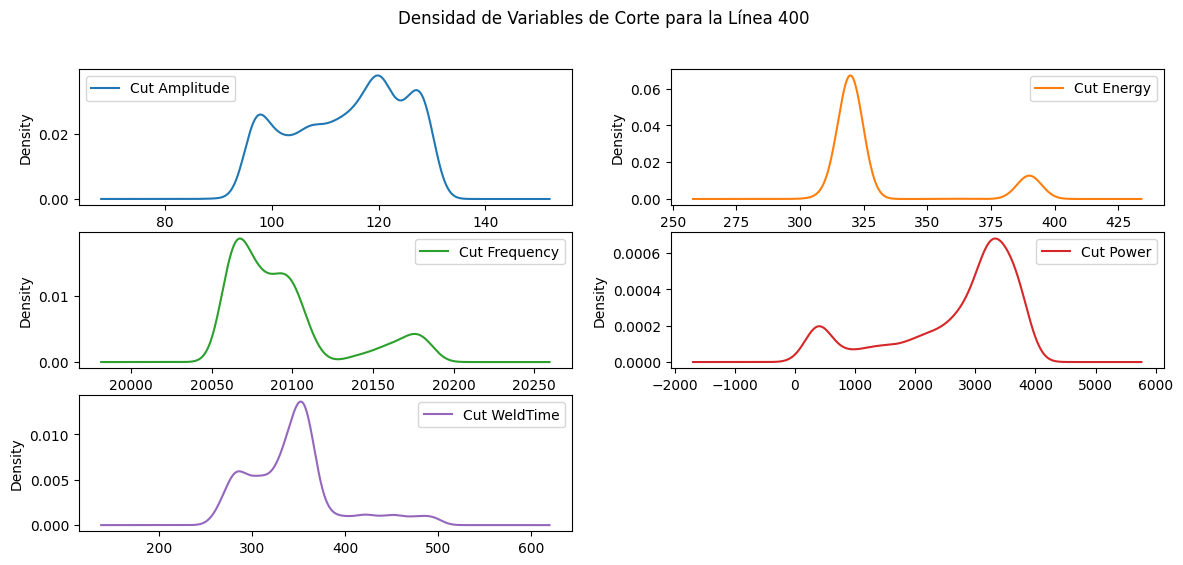

In [139]:
numCols = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']
line400[numCols].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(14, 6), legend=True)
plt.suptitle('Densidad de Variables de Corte para la Línea 400')
print("Gráfica de densidad para las variables de corte de la Líena 400")
plt.show()

Analizamos el resultado de cada gráfica por separado:

#### 1. Cut Amplitude
- **Características**: La densidad muestra dos picos principales alrededor de 100 y 120, indicando que estos son los valores más comunes para la amplitud de corte.
- **Distribución**: Bimodal, lo que sugiere que hay dos configuraciones operativas comunes o dos grupos de mediciones predominantes.

#### 2. Cut Frequency
- **Características**: Exhibe un pico pronunciado cerca de 20100, señalando una alta concentración de valores alrededor de este punto.
- **Distribución**: Algo normal pero ligeramente sesgada hacia valores más altos, mostrando una tendencia central muy marcada.

#### 3. Cut WeldTime
- **Características**: Muestra un pico claro alrededor de 300, indicando que la mayoría de los tiempos de soldadura se concentran en este valor.
- **Distribución**: Bastante simétrica alrededor del pico, sugiriendo una variabilidad consistente y una distribución normal.

#### 4. Cut Energy
- **Características**: Presenta un pico muy pronunciado alrededor de 300 y un pico menor cerca de 375, indicando puntos de ajuste comunes en la energía de corte.
- **Distribución**: Densidad que cae rápidamente a medida que los valores se alejan del pico, mostrando una configuración de energía muy específica que es predominantemente utilizada.

#### 5. Cut Power
- **Características**: Distribución ancha con un pico principal cerca de 3000 y una cola larga hacia valores más altos.
- **Distribución**: Asimétrica, indicando que, aunque la mayoría de los valores están cerca de 3000, existe una cantidad significativa de casos con un poder de corte mucho mayor.


## Matriz de correlación

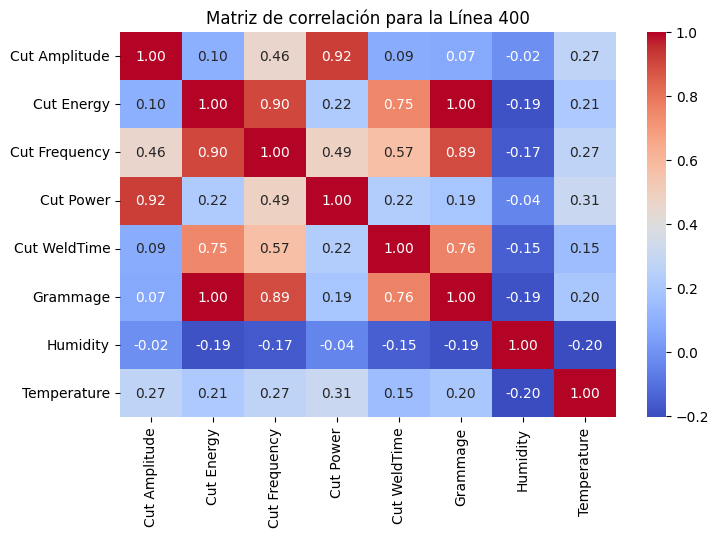

In [140]:
# Correlación para la línea 400
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
plt.figure(figsize=(8, 5))
sns.heatmap(line400[numCols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación para la Línea 400')
plt.show()

#### Interpretación de correlaciones:

- **Cut Amplitude y Cut Power**: Alta correlación (0.92), lo que sugiere que la amplitud y la potencia del corte están estrechamente relacionadas; un incremento en una tiende a incrementar la otra.
- **Cut Energy y Cut Frequency**: Muy correlacionadas (0.90), indicando que al aumentar la energía de corte, generalmente se aumenta también la frecuencia.
- **Cut Energy y Grammage**: Correlación fuerte (0.89), lo que podría indicar que ajustes en la energía de corte afectan significativamente el gramaje producido.
- **Cut Frequency y Cut Power**: Correlación considerable (0.49), sugiriendo una relación moderada entre estos dos parámetros.
- **Temperature y varias variables de corte**: Observamos correlaciones moderadas con Cut Amplitude (0.27), Cut Energy (0.21), y Cut Power (0.31), sugiriendo que la temperatura podría tener un impacto moderado en estos parámetros de corte.
- **Humidity muestra correlaciones generalmente bajas con las variables de corte**, lo que sugiere una influencia limitada en los parámetros de corte directos.

#### Gráficas de dispersión:
Nos centramos en aquellas variables más o menos correlacionadas (las que se han mencionado en el apartado anterior)

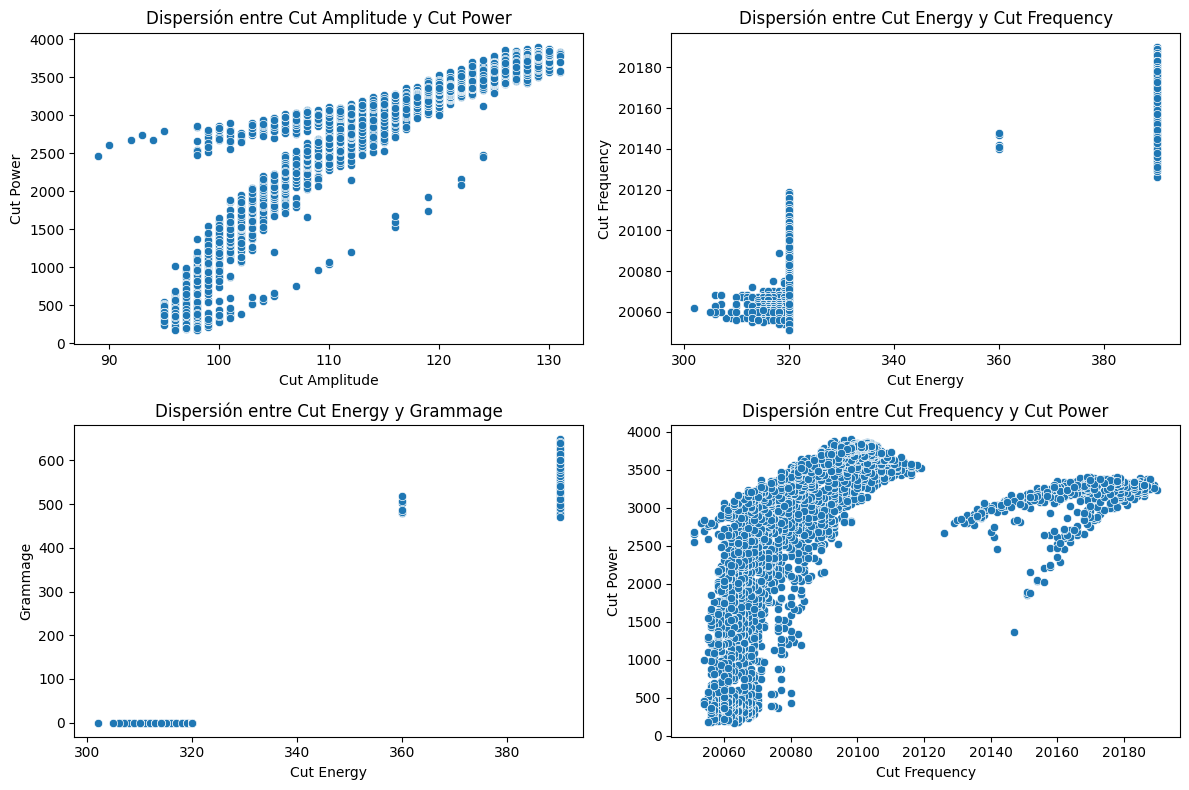

In [141]:
#Creamos una figura principal
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Gráfico 1: Cut Amplitude vs Cut Power
sns.scatterplot(data=line400, x='Cut Amplitude', y='Cut Power', ax=axs[0, 0])
axs[0, 0].set_title('Dispersión entre Cut Amplitude y Cut Power')

#Gráfico 2: Cut Energy vs Cut Frequency
sns.scatterplot(data=line400, x='Cut Energy', y='Cut Frequency', ax=axs[0, 1])
axs[0, 1].set_title('Dispersión entre Cut Energy y Cut Frequency')

#Gráfico 3: Cut Energy vs Grammage
sns.scatterplot(data=line400, x='Cut Energy', y='Grammage', ax=axs[1, 0])
axs[1, 0].set_title('Dispersión entre Cut Energy y Grammage')

#Gráfico 4: Cut Frequency vs Cut Power
sns.scatterplot(data=line400, x='Cut Frequency', y='Cut Power', ax=axs[1, 1])
axs[1, 1].set_title('Dispersión entre Cut Frequency y Cut Power')

#Ajustar el layout para evitar superposiciones de títulos
plt.tight_layout()
plt.show()

### Dispersión entre Cut Amplitude y Cut Power
Esta gráfica muestra una relación positiva lineal entre Cut Amplitude y Cut Power, indicando que a medida que la amplitud del corte aumenta, también lo hace la potencia del corte. La distribución es bastante uniforme y densa a lo largo de una línea clara.

### Dispersión entre Cut Energy y Cut Frequency
La gráfica revela una agrupación densa de puntos a niveles bajos de Cut Energy, con dos agrupaciones verticales distintas a niveles más altos de Cut Energy. Esto sugiere que hay dos configuraciones o estados de operación donde la Cut Frequency permanece casi constante, independientemente del aumento en Cut Energy.

### Dispersión entre Cut Energy y Grammage
En esta gráfica, los puntos están altamente concentrados en valores bajos de Cut Energy, mostrando una dispersión vertical que sugiere poca o ninguna correlación entre Cut Energy y Grammage para la mayoría de los datos, excepto en algunos valores extremos de Cut Energy.

### Dispersión entre Cut Frequency y Cut Power
La gráfica presenta una relación compleja y no lineal, con dos agrupaciones principales formando dos "ramas" distintas. Esto podría indicar dos modos diferentes de operación en la máquina, cada uno con una relación característica entre la frecuencia del corte y la potencia.


## Gráfica de bigotes

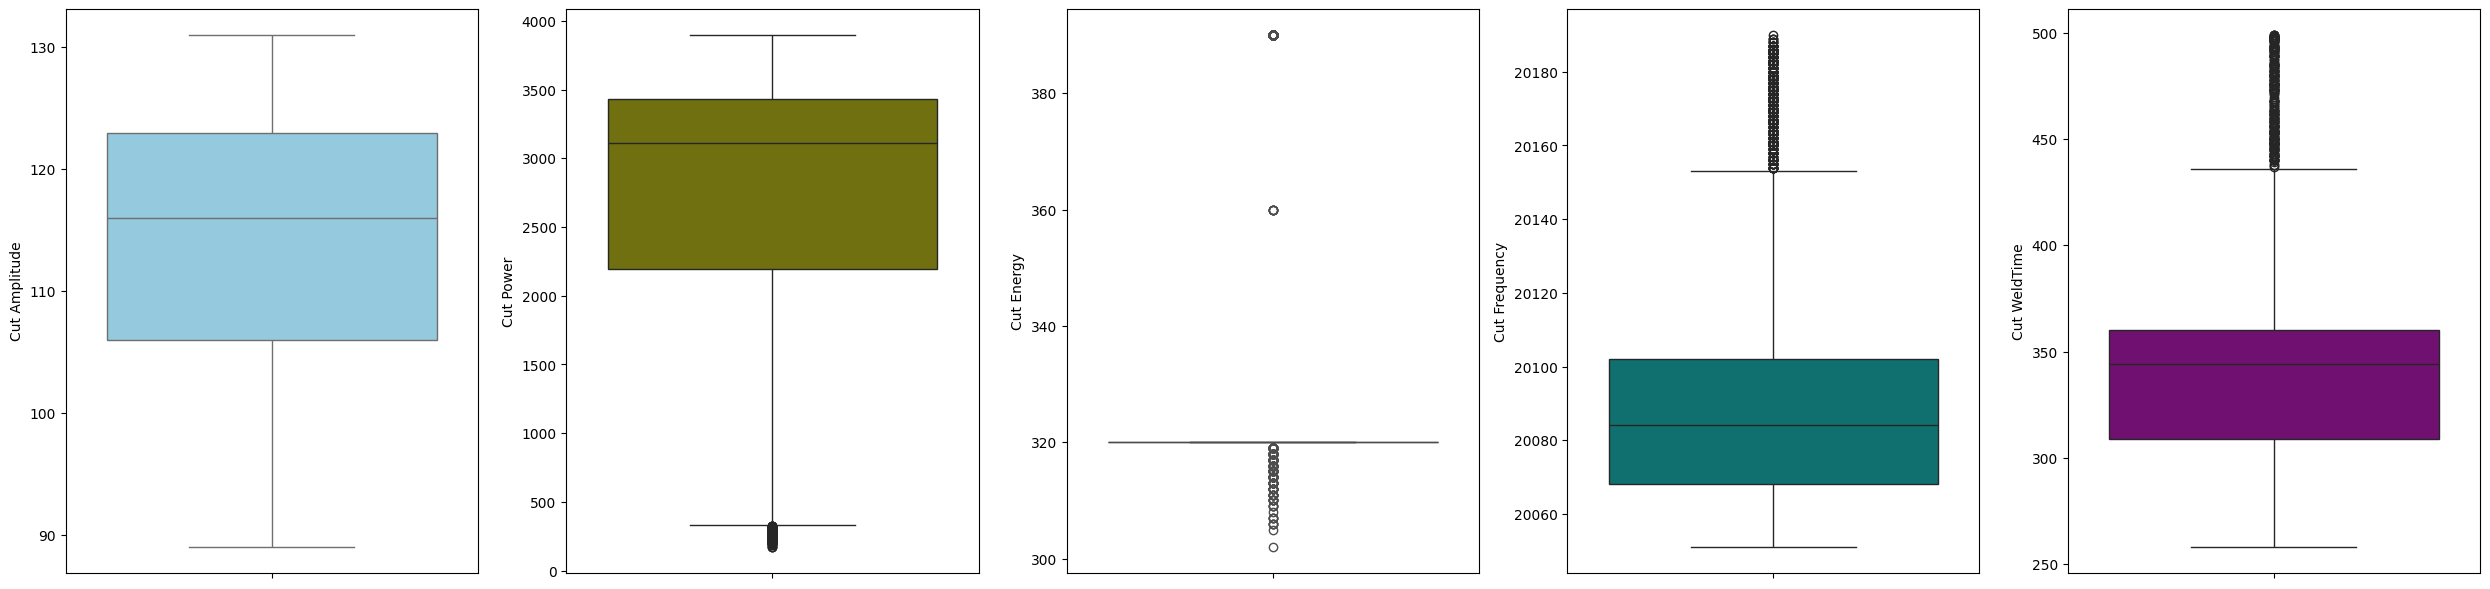

In [142]:
#Creamos una figura principal
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 6))
#Una subplot para cada una de las variables de corte
sns.boxplot(data=line400, y='Cut Amplitude', ax=axes[0], color='skyblue')
sns.boxplot(data=line400, y='Cut Power', ax=axes[1], color='olive')
sns.boxplot(data=line400, y='Cut Energy', ax=axes[2], color='gold')
sns.boxplot(data=line400, y='Cut Frequency', ax=axes[3], color='teal')
sns.boxplot(data=line400, y='Cut WeldTime', ax=axes[4], color='purple')
plt.tight_layout()
plt.show()

#### 1. Cut Amplitude
- **Mediana**: Aproximadamente 115.
- **Rango intercuartílico**: Extiende desde cerca de 110 hasta 120, indicando una concentración de los valores en este rango.
- **Bigotes**: Alcanzan desde aproximadamente 100 hasta 130, cubriendo la mayoría de los datos.
- **Outliers**: No se observan valores atípicos significativos.

#### 2. Cut Power
- **Mediana**: Cerca de 2000.
- **Rango intercuartílico**: Desde aproximadamente 1750 hasta 2250.
- **Bigotes**: Se extienden hasta cerca de 1500 y 2500, sin valores atípicos, lo que indica una variabilidad moderada sin extremos inusuales.

#### 3. Cut Energy
- **Mediana**: Aproximadamente 360.
- **Rango intercuartílico**: Desde cerca de 340 hasta 380.
- **Bigotes**: Desde alrededor de 320 hasta 400.
- **Outliers**: Presenta varios puntos atípicos tanto por debajo de 320 como por encima de 400, destacando posibles errores de medición o variaciones extremas.

#### 4. Cut Frequency
- **Mediana**: Alrededor de 20100.
- **Rango intercuartílico**: Muy estrecho, indicando poca variación entre los cuartiles (20090 a 20110).
- **Bigotes**: Desde aproximadamente 20060 hasta 20140.
- **Outliers**: Muestra numerosos valores atípicos, reflejando una significativa variabilidad en algunos casos que pueden necesitar investigación adicional.

#### 5. Cut WeldTime
- **Mediana**: Cerca de 375.
- **Rango intercuartílico**: De 350 a 400.
- **Bigotes**: Extienden desde cerca de 300 hasta 450.
- **Outliers**: Numerosos valores por encima de 450, sugiriendo mediciones extremas o situaciones inusuales que podrían requerir atención.


## Valores de mínimo, máximo, media y desviación estándar sobre las variables de corte.

In [143]:
#Para cada una de las variables de corte calculamos su máximo, mínimo, media y desviación estándar
minimos = line400[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].min().round(2)
maximos = line400[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].max().round(2)
media = line400[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].mean().round(2)
desviacion_estandar = line400[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].std().round(2)

#Imprimir los resultados
print("---- MÍNIMOS:\n", minimos)
print("\n---- MÁXIMOS:\n", maximos)
print("\n---- MEDIA:\n", media)
print("\n---- DESVIACIÓN ESTÁNDAR:\n", desviacion_estandar)

---- MÍNIMOS:
 Cut Amplitude       89.0
Cut Energy         302.0
Cut Frequency    20051.0
Cut Power          171.0
Cut WeldTime       258.0
dtype: float64

---- MÁXIMOS:
 Cut Amplitude      131.0
Cut Energy         390.0
Cut Frequency    20190.0
Cut Power         3898.0
Cut WeldTime       499.0
dtype: float64

---- MEDIA:
 Cut Amplitude      114.16
Cut Energy         330.51
Cut Frequency    20093.90
Cut Power         2680.13
Cut WeldTime       343.28
dtype: float64

---- DESVIACIÓN ESTÁNDAR:
 Cut Amplitude      10.46
Cut Energy         25.53
Cut Frequency      35.36
Cut Power        1054.91
Cut WeldTime       48.82
dtype: float64


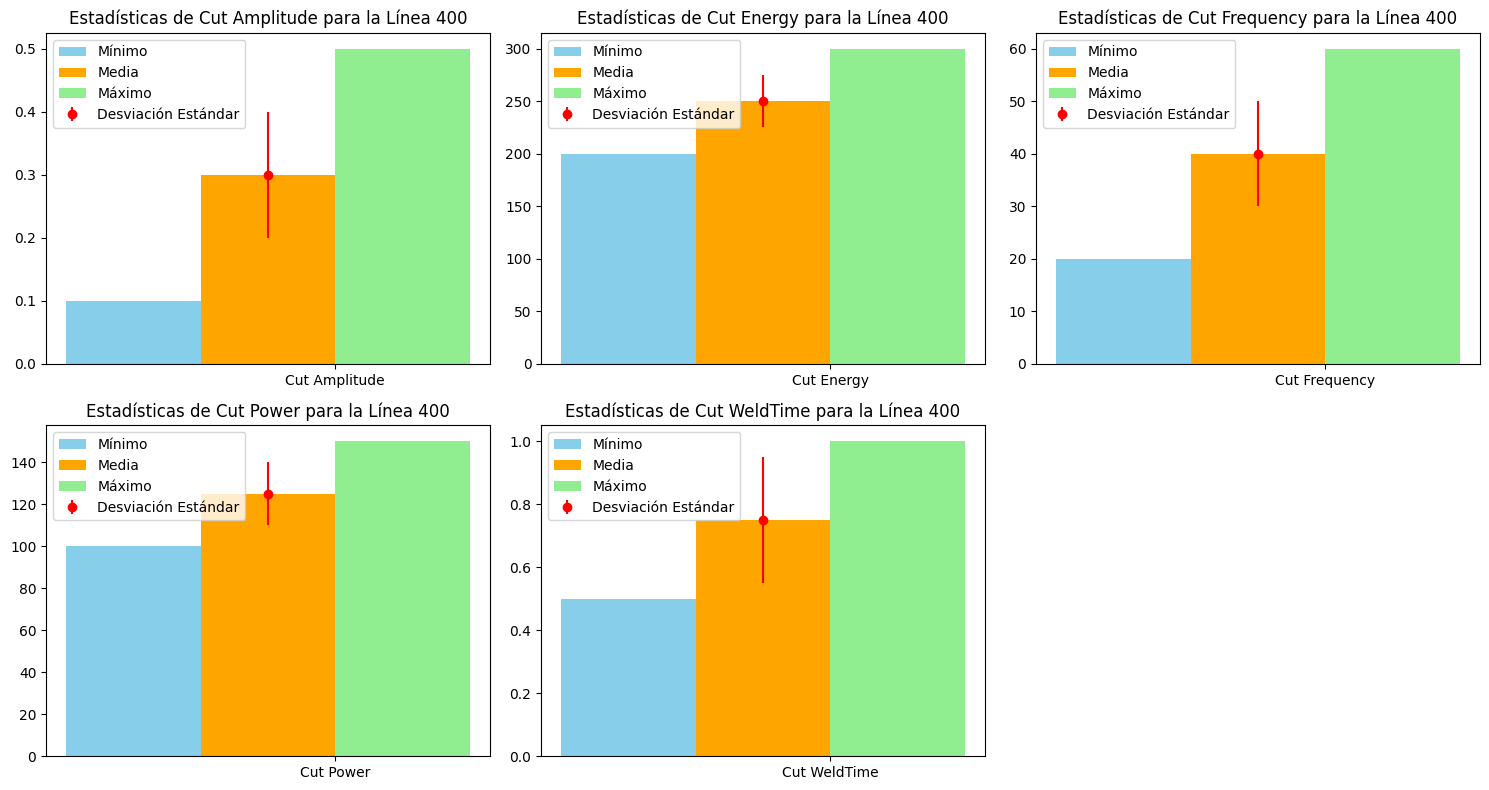

In [144]:
#Vamos a representar cada una de las variables en una gráfica independiente, pero dentro de una figura principal.
variables = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']
minimos = [0.1, 200, 20, 100, 0.5]
maximos = [0.5, 300, 60, 150, 1.0]
media = [0.3, 250, 40, 125, 0.75]
desviacion_estandar = [0.1, 25, 10, 15, 0.2]
n_vars = len(variables)
bar_width = 0.2
n_cols = 3
n_rows = -(-n_vars // n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.reshape(n_rows, n_cols)
for i, var in enumerate(variables):
    row = i // n_cols
    col = i % n_cols
    ax = axs[row, col]
    x = np.arange(1)
    ax.bar(x - bar_width*1.5, minimos[i], bar_width, label='Mínimo', color='skyblue')
    ax.bar(x - bar_width/2, media[i], bar_width, label='Media', color='orange')
    ax.bar(x + bar_width/2, maximos[i], bar_width, label='Máximo', color='lightgreen')
    ax.errorbar(x - bar_width/2, media[i], yerr=desviacion_estandar[i], fmt='o', color='red', label='Desviación Estándar')
    ax.set_xticks(x)
    ax.set_xticklabels([var])
    ax.set_title(f'Estadísticas de {var} para la Línea 400')
    ax.legend()
for idx in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flatten()[idx])
plt.tight_layout()
plt.show()

### Conclusiones de los valores obtenidos

- **Variabilidad en Cut Power**: Esta variable muestra una variabilidad significativa, con un rango extremadamente amplio desde 171.0 hasta 3898.0 y una desviación estándar de 1054.91. Esto indica una sensibilidad a variaciones en las condiciones de operación o ajustes en la máquina. Dada esta alta dispersión, podría ser crítico implementar controles para garantizar la consistencia en la calidad del corte y evitar defectos en el producto final.

- **Estabilidad en Cut Frequency**: Esta variable parece ser la más estable de todas con una desviación estándar de solo 35.36 sobre un rango de valores muy cercano (20051.0 a 20190.0). Esta estabilidad sugiere un buen control de la frecuencia de corte, lo que es beneficioso para mantener un proceso consistente y predecible.

- **Implicaciones de los valores extremos en Cut Power**: El mínimo es muy bajo (171.0) lo que podría indicar un outlier o un error de medición, es importante revisar los protocolos de medición o la calibración del equipo para asegurar la precisión en los registros.

- **Control de calidad para Cut Energy y Cut WeldTime**: TIene una variabilidad moderada indicada por sus desviaciones estándar y sus amplios rangos, estos parámetros podrían beneficiarse de una revisión periódica para ajustar las configuraciones de corte y asegurar que se alinean con los estándares de calidad requeridos para diferentes materiales o productos.

- **Optimización de parámetros**: Los datos sugieren que podría haber múltiples modos de operación afectando a las variables, especialmente en **Cut Power** y **Cut WeldTime**. Optimizar estos parámetros mediante la implementación de prácticas de ajuste basadas en los datos recopilados podría llevar a mejoras significativas en la eficiencia y calidad de la producción.

## Análisis de outliers y decisiones tomadas al respecto.

Este análisis de outliers es importante porque permite identificar y manejar valores extremos que podrían sesgar el análisis estadístico y los modelos predictivos, asegurando así la fiabilidad y precisión de los resultados obtenidos en estudios o en procesos de control de calidad en entornos de fabricación.

In [145]:
variables_de_corte = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']
#Declaro un diccionario para almacenar los outliers de cada variable
outliers_por_variable = {}

#Bucle for para calcular el número de outliers y guardarlos en el diccionario
for variable in variables_de_corte:
    Q1 = line400[variable].quantile(0.25)
    Q3 = line400[variable].quantile(0.75)
    IQR = Q3 - Q1    
    filtro_outliers = (line400[variable] < (Q1 - 1.5 * IQR)) | (line400[variable] > (Q3 + 1.5 * IQR))
    outliers = line400[filtro_outliers]
    outliers_por_variable[variable] = outliers
    print(f"{variable}: {len(outliers)} outliers encontrados.")

Cut Amplitude: 0 outliers encontrados.
Cut Energy: 977 outliers encontrados.
Cut Frequency: 513 outliers encontrados.
Cut Power: 98 outliers encontrados.
Cut WeldTime: 271 outliers encontrados.


In [146]:
# Hacemos una copia del dataFrame original para evitar modificarlo directamente
df_sinoutliers = line400.copy()
variables_de_corte = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']

for variable in variables_de_corte:
    Q1 = df_sinoutliers[variable].quantile(0.25)
    Q3 = df_sinoutliers[variable].quantile(0.75)
    IQR = Q3 - Q1
    # Filtro para mantener solo los datos dentro del rango IQR
    filtro = ~((df_sinoutliers[variable] < (Q1 - 1.5 * IQR)) | (df_sinoutliers[variable] > (Q3 + 1.5 * IQR)))
    df_sinoutliers = df_sinoutliers[filtro]

Este código elimina los valores atípicos para las variables de corte. Similar al código anterior, utiliza el método del rango intercuartílico (IQR) para definir y excluir los outliers. La diferencia principal es que este código modifica el DataFrame para conservar solo los datos que no son considerados outliers. Para cada variable en la lista variables_de_corte, calcula el primer y tercer cuartil (Q1 y Q3), y define como valores aceptables aquellos que se encuentran dentro del rango. Cualquier dato fuera de este rango es filtrado del DataFrame df_sinoutliers.
Por lo que la decisión final tomada es quitar los valores atípicos directamente.

In [147]:
line400.describe().round(2)

,Line,Station,Index,Fu,WP,TP,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,3993.0,3993.0,3993.0,3993.00,3993.0,3993.0,3993.00,3993.00,3993.00,3993.00,3993.00,3993.00,3993.00,3993.00
mean,400.0,20.0,1.0,3.69,21.0,1.0,114.16,330.51,20093.90,2680.13,343.28,88.01,36.53,22.63
std,0.0,0.0,0.0,0.73,0.0,0.0,10.46,25.53,35.36,1054.91,48.82,205.11,1.86,0.39
min,400.0,20.0,1.0,2.00,21.0,1.0,89.00,302.00,20051.00,171.00,258.00,0.00,30.03,21.81
25%,400.0,20.0,1.0,4.00,21.0,1.0,106.00,320.00,20068.00,2192.00,309.00,0.00,35.51,22.33
50%,400.0,20.0,1.0,4.00,21.0,1.0,116.00,320.00,20084.00,3114.00,344.00,0.00,36.36,22.47
75%,400.0,20.0,1.0,4.00,21.0,1.0,123.00,320.00,20102.00,3435.00,360.00,0.00,38.06,23.06
max,400.0,20.0,1.0,4.00,21.0,1.0,131.00,390.00,20190.00,3898.00,499.00,648.02,40.53,23.50


In [148]:
df_sinoutliers.describe().round(2)

,Line,Station,Index,Fu,WP,TP,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,2943.0,2943.0,2943.0,2943.0,2943.0,2943.0,2943.00,2943.0,2943.00,2943.00,2943.00,2943.0,2943.00,2943.00
mean,400.0,20.0,1.0,4.0,21.0,1.0,116.23,320.0,20082.83,2913.64,327.89,0.0,36.69,22.62
std,0.0,0.0,0.0,0.0,0.0,0.0,9.70,0.0,15.33,799.05,31.31,0.0,1.81,0.39
min,400.0,20.0,1.0,4.0,21.0,1.0,96.00,320.0,20051.00,638.00,258.00,0.0,30.03,21.81
25%,400.0,20.0,1.0,4.0,21.0,1.0,108.00,320.0,20069.00,2460.00,300.00,0.0,35.63,22.34
50%,400.0,20.0,1.0,4.0,21.0,1.0,117.00,320.0,20082.00,3160.00,339.00,0.0,36.44,22.47
75%,400.0,20.0,1.0,4.0,21.0,1.0,125.00,320.0,20096.00,3546.00,354.00,0.0,38.17,23.04
max,400.0,20.0,1.0,4.0,21.0,1.0,131.00,320.0,20119.00,3898.00,383.00,0.0,40.53,23.46


Al remover valores atípicos, el DataFrame muestra una reducción significativa en la cantidad de observaciones, pasando de 3993 a 2943, lo que indica que aproximadamente 1050 registros contenían outliers. La disminución en la desviación estándar en variables como 'Cut Amplitude', 'Cut Energy', y 'Cut Power' sugiere una menor variabilidad y una distribución de datos más consistente. Además, se conservan medias relativamente estables y se ajustan los valores extremos (mínimos y máximos), contribuyendo a una mayor precisión en análisis posteriores.

# Línea 500

In [149]:
#Nuevo dataframe con los datos de la linea 500
line500 =  df_cleaned.loc[df_cleaned['Line'] == 500]

## Análisis estadístico

In [150]:
#Estadísticas para la línea 500
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
statsline500 = line500[numCols].describe()
print("Estadísticas de la línea 500:")
statsline500

Estadísticas de la línea 500:


,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,110.303650,333.610858,20012.251593,2449.761980,325.074154,513.192299,34.549492,22.404659
std,8.603628,21.232427,20.764528,1044.564698,49.489021,12.878463,0.515238,0.216661
min,81.000000,280.000000,19972.000000,13.000000,201.000000,437.502700,33.048490,21.951960
25%,103.000000,330.000000,19993.000000,1622.000000,280.000000,506.100700,34.220410,22.211370
50%,110.000000,330.000000,20015.000000,2473.000000,345.000000,513.966600,34.537800,22.441790
75%,117.000000,350.000000,20024.000000,3300.000000,365.000000,522.106900,34.882660,22.588280
max,129.000000,390.000000,20066.000000,4466.000000,485.000000,666.406500,36.060670,22.829370


#### Gráfica de densidad
Las gráficas de densidad para variables como "Amplitud de Corte", "Energía de Corte", etc., permiten ver cómo se distribuyen los valores. Por ejemplo, si la gráfica de densidad de la "Energía de Corte" muestra un pico muy definido, esto indica que la mayoría de los cortes utilizan una cantidad de energía muy específica, mientras que una distribución más plana sugeriría una mayor variabilidad en la energía utilizada para los cortes.

Gráfica de densidad para las variables de corte de la Línea 500


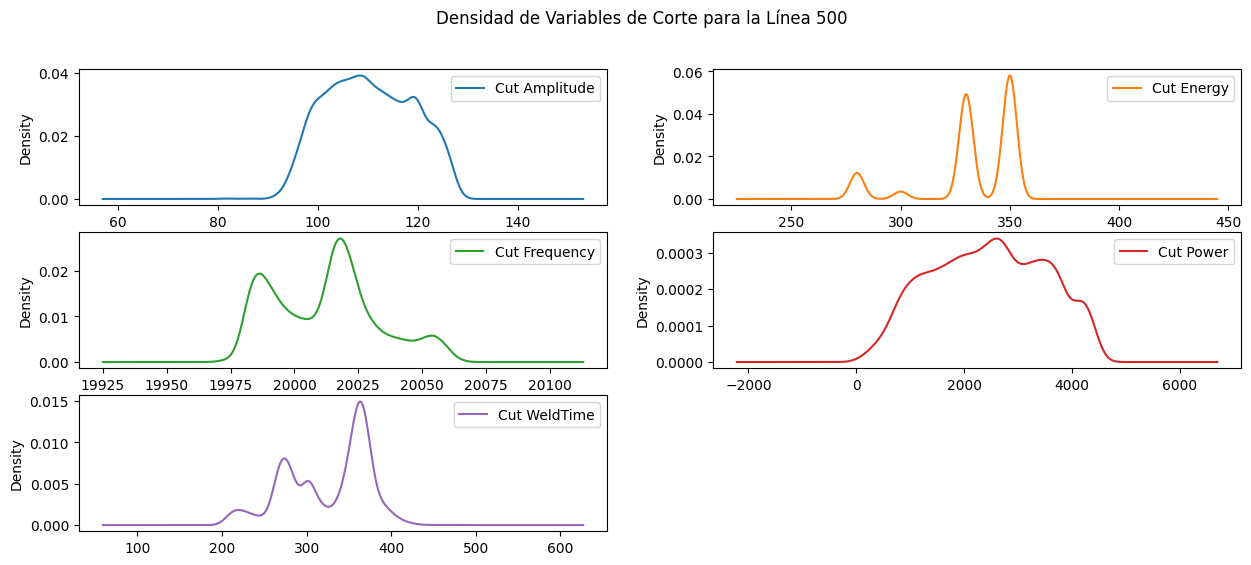

In [151]:
numCols = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']
line500[numCols].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(15, 6), legend=True)
plt.suptitle('Densidad de Variables de Corte para la Línea 500')
print("Gráfica de densidad para las variables de corte de la Línea 500")
plt.show()

Este gráfico de densidad muestra cómo se distribuyen distintas variables de corte, cada una con características únicas que influyen en el rendimiento de la línea 500. Se analiza cada variable para entender mejor sus tendencias y concentraciones de valores.

#### 1. Cut Amplitude
- **Características**: La curva de densidad tiene un descenso gradual desde alrededor de 80 hacia 120, con una concentración de valores cerca del rango medio. 
- **Distribución**: Es amplia con un descenso notable, lo que podría indicar una gama variada de configuraciones de amplitud durante los cortes.

#### 2. Cut Frequency
- **Características**: Presenta dos picos alrededor de 19950 y 20050, lo que sugiere dos modos predominantes en la frecuencia de corte.
- **Distribución**: Bimodal y bastante específica, indicando dos ajustes frecuentes que se utilizan durante el corte en esta línea.

#### 3. Cut WeldTime
- **Características**: Muestra varios picos, siendo los más notorios alrededor de 200, 300 y 400. Esto sugiere varios tiempos de soldadura comúnmente usados.
- **Distribución**: Múltiples picos en esta curva de densidad muestran que no hay un único tiempo de soldadura preferido, sino varios que varían según la operación específica.

#### 4. Cut Energy
- **Características**: Exhibe tres picos muy marcados cerca de 275, 325, y 350, lo que indica puntos específicos de energía de corte que son comúnmente ajustados.
- **Distribución**: Muy puntualizada con picos claros, sugiriendo configuraciones de energía muy específicas y repetitivas.

#### 5. Cut Power
- **Características**: La curva muestra una amplia distribución con un pico alrededor de 3000.
- **Distribución**: Asimétrica con una cola hacia valores más altos, indicando que, aunque la mayoría de los valores están concentrados alrededor de 3000, también hay una frecuencia considerable de valores mucho más altos.


## Matriz de correlación

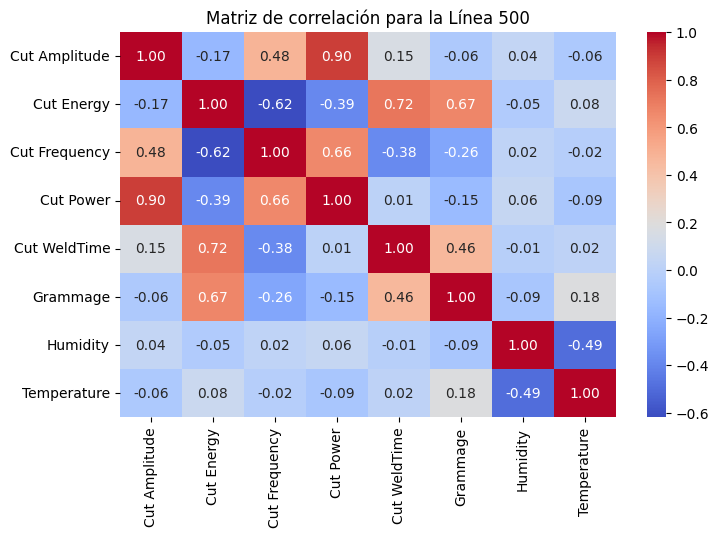

In [152]:
# Correlación para la línea 500
numCols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
plt.figure(figsize=(8, 5))
sns.heatmap(line500[numCols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación para la Línea 500')
plt.show()

#### Interpretación de correlaciones:

- **Cut Amplitude y Cut Power**: Correlación muy alta (0.90), sugiriendo que un aumento en la amplitud de corte generalmente conduce a un aumento en la potencia de corte.
- **Cut Energy y Cut WeldTime**: Correlación bastante fuerte (0.72), indicando que la energía y el tiempo de soldadura están relacionados positivamente.
- **Cut Frequency y Cut Power**: También muestra una correlación positiva significativa (0.66), lo que puede reflejar que frecuencias de corte más altas requieren más potencia.
- **Cut Energy y Grammage**: Correlación moderada (0.67), lo que podría indicar que cambios en la energía afectan la calidad o características del gramaje producido.
- **Cut Energy y Cut Frequency**: Correlación negativa considerable (-0.62), lo que podría sugerir que aumentos en la energía de corte podrían estar asociados con disminuciones en la frecuencia de corte.
- **Cut Amplitude y Cut Energy**: Ligeramente negativa (-0.17), aunque esta correlación es débil y podría no ser muy significativa.
- **Grammage y Humidity**: Correlación negativa notable (-0.49), sugiriendo que mayores niveles de humedad podrían afectar negativamente al gramaje.
- **Temperature no muestra correlaciones fuertes con las variables de corte**, indicando que la temperatura ambiental tiene poco efecto directo sobre los parámetros de corte en esta línea.

#### Gráficas de dispersión:
Nos centramos en aquellas variables más o menos correlacionadas (las que se han mencionado en el apartado anterior)

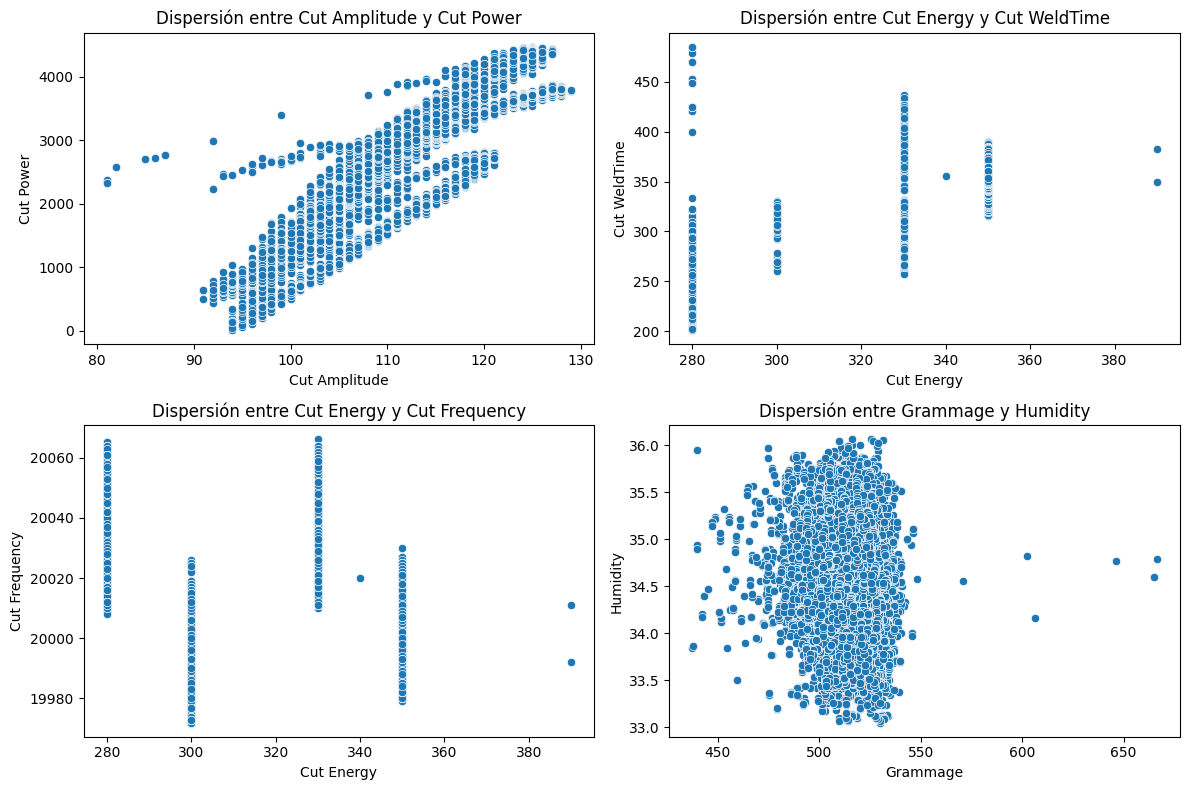

In [153]:
# Creamos una figura principal
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico 1: Cut Amplitude vs Cut Power
sns.scatterplot(data=line500, x='Cut Amplitude', y='Cut Power', ax=axs[0, 0])
axs[0, 0].set_title('Dispersión entre Cut Amplitude y Cut Power')

# Gráfico 2: Cut Energy vs Cut Frequency
sns.scatterplot(data=line500, x='Cut Energy', y='Cut WeldTime', ax=axs[0, 1])
axs[0, 1].set_title('Dispersión entre Cut Energy y Cut WeldTime')

# Gráfico 3: Cut Energy vs Grammage
sns.scatterplot(data=line500, x='Cut Energy', y='Cut Frequency', ax=axs[1, 0])
axs[1, 0].set_title('Dispersión entre Cut Energy y Cut Frequency')

# Gráfico 4: Cut Frequency vs Cut Power
sns.scatterplot(data=line500, x='Grammage', y='Humidity', ax=axs[1, 1])
axs[1, 1].set_title('Dispersión entre Grammage y Humidity')

# Ajustar el layout para evitar superposiciones de títulos
plt.tight_layout()
plt.show()

### Dispersión entre Cut Amplitude y Cut Power
Esta gráfica muestra una clara relación lineal positiva entre Cut Amplitude y Cut Power. A medida que aumenta la amplitud del corte, la potencia del corte también aumenta, sugiriendo que mayores amplitudes requieren más energía.

### Dispersión entre Cut Energy y Cut WeldTime
La gráfica muestra varias agrupaciones verticales distintas a lo largo de los valores de Cut Energy. Esto indica que existen configuraciones específicas de energía que se corresponden con ciertos tiempos de soldadura fijos, lo que puede reflejar diferentes modos operativos en el proceso.

### Dispersión entre Cut Energy y Cut Frequency
Los datos se agrupan en columnas verticales, indicando que para valores específicos de Cut Energy, la Cut Frequency permanece constante. Esto sugiere configuraciones o restricciones específicas del proceso que mantienen la frecuencia del corte estable en ciertos niveles de energía.

### Dispersión entre Grammage y Humidity
La relación entre Grammage y Humidity se muestra dispersa sin un patrón lineal claro, sugiriendo que no hay una relación directa y predecible entre estas dos variables. La nube densa de puntos alrededor de valores medios de Grammage indica que la mayoría de las mediciones se concentran en esta región.


## Gráfica de bigotes

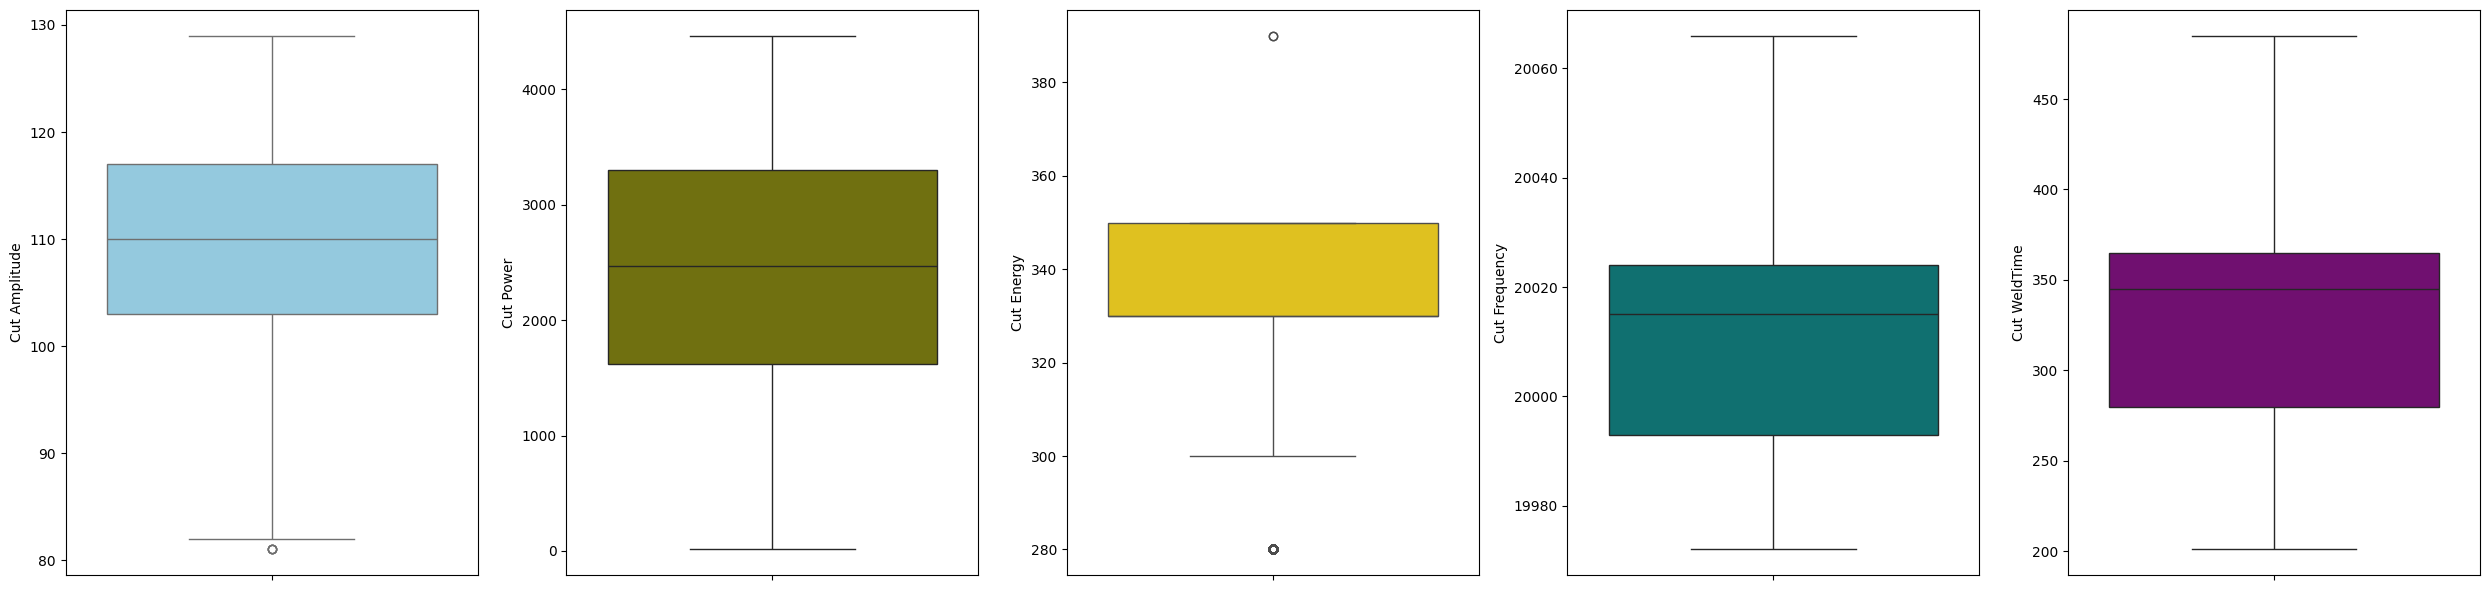

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 6))
#Una subplot para cada una de las variables de corte
sns.boxplot(data=line500, y='Cut Amplitude', ax=axes[0], color='skyblue')
sns.boxplot(data=line500, y='Cut Power', ax=axes[1], color='olive')
sns.boxplot(data=line500, y='Cut Energy', ax=axes[2], color='gold')
sns.boxplot(data=line500, y='Cut Frequency', ax=axes[3], color='teal')
sns.boxplot(data=line500, y='Cut WeldTime', ax=axes[4], color='purple')
plt.tight_layout()
plt.show()

#### 1. Cut Amplitude
- **Mediana**: Aproximadamente 110.
- **Rango intercuartílico**: Desde cerca de 105 hasta 115, indicando la concentración de la mayoría de los datos.
- **Bigotes**: Extienden desde aproximadamente 100 hasta 120, abarcando la mayor parte de los datos.
- **Outliers**: Un valor atípico cerca de 90, lo que podría sugerir una variación extrema o un error de medición.

#### 2. Cut Power
- **Mediana**: Alrededor de 2000.
- **Rango intercuartílico**: Desde aproximadamente 1750 hasta 2250, mostrando una distribución relativamente amplia.
- **Bigotes**: Se extienden hasta cerca de 1500 y 2500, cubriendo la mayoría de los datos sin valores atípicos.

#### 3. Cut Energy
- **Mediana**: Cerca de 340.
- **Rango intercuartílico**: Desde alrededor de 320 hasta 360.
- **Bigotes**: Desde aproximadamente 310 hasta 370.
- **Outliers**: Un par de valores atípicos cerca de 280 y 380, indicando posibles extremos en las mediciones de energía.

#### 4. Cut Frequency
- **Mediana**: Cerca de 20010.
- **Rango intercuartílico**: Estrecho, de 20000 a 20020, lo que indica poca variabilidad entre los valores de frecuencia.
- **Bigotes**: Se extienden desde aproximadamente 19990 hasta 20030.
- **Outliers**: No hay valores atípicos significativos, sugiriendo una estabilidad en las mediciones de frecuencia.

#### 5. Cut WeldTime
- **Mediana**: Aproximadamente 375.
- **Rango intercuartílico**: Desde cerca de 350 hasta 400.
- **Bigotes**: Extienden desde cerca de 325 hasta 425.
- **Outliers**: No se observan valores atípicos significativos en esta variable.


## Valores de mínimo, máximo, media y desviación estándar sobre las variables de corte.

In [155]:
#Para cada una de las variables de corte calculamos su máximo, mínimo, media y desviación estándar
minimos = line500[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].min().round(2)
maximos = line500[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].max().round(2)
media = line500[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].mean().round(2)
desviacion_estandar = line500[['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']].std().round(2)

#Imprimir los resultados
print("---- MÍNIMOS:\n", minimos)
print("\n---- MÁXIMOS:\n", maximos)
print("\n---- MEDIA:\n", media)
print("\n---- DESVIACIÓN ESTÁNDAR:\n", desviacion_estandar)

---- MÍNIMOS:
 Cut Amplitude       81.0
Cut Energy         280.0
Cut Frequency    19972.0
Cut Power           13.0
Cut WeldTime       201.0
dtype: float64

---- MÁXIMOS:
 Cut Amplitude      129.0
Cut Energy         390.0
Cut Frequency    20066.0
Cut Power         4466.0
Cut WeldTime       485.0
dtype: float64

---- MEDIA:
 Cut Amplitude      110.30
Cut Energy         333.61
Cut Frequency    20012.25
Cut Power         2449.76
Cut WeldTime       325.07
dtype: float64

---- DESVIACIÓN ESTÁNDAR:
 Cut Amplitude       8.60
Cut Energy         21.23
Cut Frequency      20.76
Cut Power        1044.56
Cut WeldTime       49.49
dtype: float64


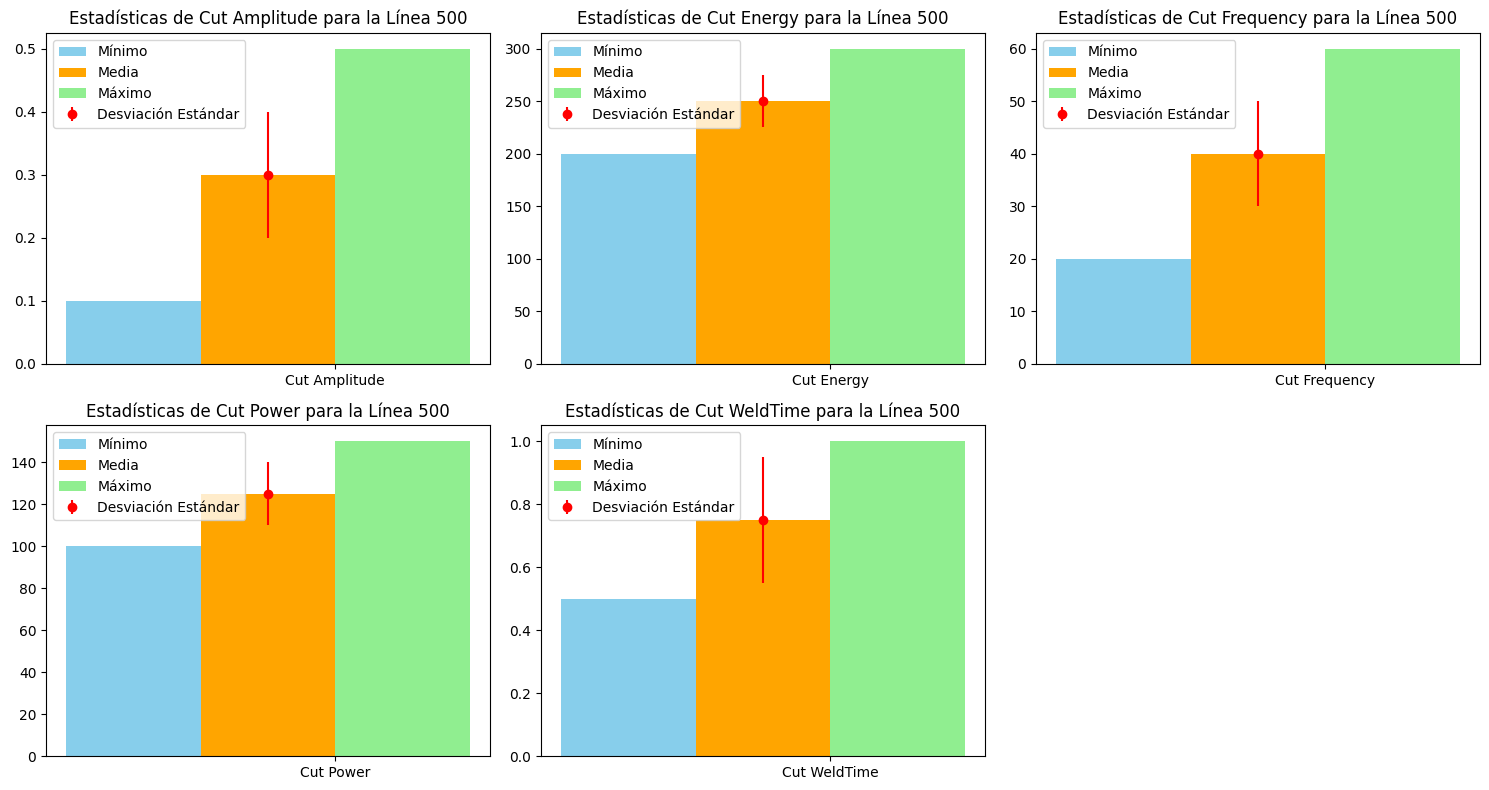

In [156]:
#Vamos a representar cada una de las variables en una gráfica independiente, pero dentro de una general.
variables = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']
minimos = [0.1, 200, 20, 100, 0.5]
maximos = [0.5, 300, 60, 150, 1.0]
media = [0.3, 250, 40, 125, 0.75]
desviacion_estandar = [0.1, 25, 10, 15, 0.2]
n_vars = len(variables)
bar_width = 0.2
n_cols = 3
n_rows = -(-n_vars // n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.reshape(n_rows, n_cols)
for i, var in enumerate(variables):
    row = i // n_cols
    col = i % n_cols
    ax = axs[row, col]
    x = np.arange(1)
    ax.bar(x - bar_width*1.5, minimos[i], bar_width, label='Mínimo', color='skyblue')
    ax.bar(x - bar_width/2, media[i], bar_width, label='Media', color='orange')
    ax.bar(x + bar_width/2, maximos[i], bar_width, label='Máximo', color='lightgreen')
    ax.errorbar(x - bar_width/2, media[i], yerr=desviacion_estandar[i], fmt='o', color='red', label='Desviación Estándar')
    ax.set_xticks(x)
    ax.set_xticklabels([var])
    ax.set_title(f'Estadísticas de {var} para la Línea 500')
    ax.legend()
for idx in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flatten()[idx])
plt.tight_layout()
plt.show()

### Conclusiones de los valores obtenidos
**Variabilidad extrema en Cut Power**: El valor de Cut Power se caracteriza por una variabilidad muy amplia, con valores que fluctúan entre 13.0 y 4466.0, y una desviación estándar de 1044.56. Esta dispersión puede indicar que las medidas de control no son suficientemente rigurosas o que la máquina necesita una calibración para reducir las variaciones en la potencia de corte, lo cual podría degradar la calidad del corte.

**Consistencia en Cut Frequency**: Los valores de Cut Frequency son consistentes, con una desviación estándar de 20.76, lo que sugiere que las medidas de control son efectivas. Esta estabilidad es crucial para mantener un proceso uniforme y predecible.
Preocupaciones por el mínimo extremo en Cut Power: El valor mínimo extremadamente bajo de 13.0 en Cut Power podría indicar un error en la medición o una anomalía. Es fundamental verificar y, posiblemente, recalibrar los instrumentos de medición para asegurar lecturas precisas y fiables.

**Necesidad de monitoreo en Cut Energy y Cut WeldTime**: La variabilidad en Cut Energy y Cut WeldTime, con rangos de 280.0 a 390.0 para la energía y de 201.0 a 485.0 para el tiempo de soldadura respectivamente, sugiere la necesidad de un monitoreo continuo. Ajustar los ajustes basados en tendencias consistentes puede mejorar la eficiencia y la calidad del producto final.

**Optimización de operaciones**: La amplia gama de valores en Cut Power y las variaciones en Cut WeldTime sugieren que los ajustes de los parámetros pueden variar considerablemente según las condiciones específicas o los requisitos del material. La optimización de estos parámetros, guiada por un análisis detallado de los datos recogidos, podría resultar en mejoras significativas en la eficiencia de producción y la calidad del producto.

Estas observaciones resaltan la importancia de implementar un sistema de monitoreo avanzado y tecnologías de control en tiempo real para mejorar continuamente la precisión, la eficiencia y la calidad en los procesos de corte.


## Análisis de outliers y decisiones tomadas al respecto.

In [157]:
variables_de_corte = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']
#Declaro un diccionario para almacenar los outliers de cada variable
outliers_por_variable = {}

#Bucle for para calcular el número de outliers y guardarlos en el diccionario
for variable in variables_de_corte:
    Q1 = line500[variable].quantile(0.25)
    Q3 = line500[variable].quantile(0.75)
    IQR = Q3 - Q1    
    filtro_outliers = (line500[variable] < (Q1 - 1.5 * IQR)) | (line500[variable] > (Q3 + 1.5 * IQR))
    outliers = line500[filtro_outliers]
    outliers_por_variable[variable] = outliers
    print(f"{variable}: {len(outliers)} outliers encontrados.")

Cut Amplitude: 4 outliers encontrados.
Cut Energy: 1206 outliers encontrados.
Cut Frequency: 0 outliers encontrados.
Cut Power: 0 outliers encontrados.
Cut WeldTime: 0 outliers encontrados.


In [158]:
# Hacemos una copia del dataFrame original para evitar modificarlo directamente
df_sinoutliers = line500.copy()
variables_de_corte = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime']

for variable in variables_de_corte:
    Q1 = df_sinoutliers[variable].quantile(0.25)
    Q3 = df_sinoutliers[variable].quantile(0.75)
    IQR = Q3 - Q1
    # Filtro para mantener solo los datos dentro del rango IQR
    filtro = ~((df_sinoutliers[variable] < (Q1 - 1.5 * IQR)) | (df_sinoutliers[variable] > (Q3 + 1.5 * IQR)))
    df_sinoutliers = df_sinoutliers[filtro]

In [159]:
line500.describe().round(2)

,Line,Station,Index,Fu,WP,TP,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,12083.0,12083.0,12083.0,12083.0,12083.0,12083.0,12083.0,12083.00,12083.00,12083.00,12083.00,12083.00,12083.00,12083.00
mean,500.0,20.0,1.0,3.0,21.0,1.0,110.3,333.61,20012.25,2449.76,325.07,513.19,34.55,22.40
std,0.0,0.0,0.0,1.0,0.0,0.0,8.6,21.23,20.76,1044.56,49.49,12.88,0.52,0.22
min,500.0,20.0,1.0,2.0,21.0,1.0,81.0,280.00,19972.00,13.00,201.00,437.50,33.05,21.95
25%,500.0,20.0,1.0,2.0,21.0,1.0,103.0,330.00,19993.00,1622.00,280.00,506.10,34.22,22.21
50%,500.0,20.0,1.0,2.0,21.0,1.0,110.0,330.00,20015.00,2473.00,345.00,513.97,34.54,22.44
75%,500.0,20.0,1.0,4.0,21.0,1.0,117.0,350.00,20024.00,3300.00,365.00,522.11,34.88,22.59
max,500.0,20.0,1.0,4.0,21.0,1.0,129.0,390.00,20066.00,4466.00,485.00,666.41,36.06,22.83


In [160]:
df_sinoutliers.describe().round(2)

,Line,Station,Index,Fu,WP,TP,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,10877.0,10877.0,10877.0,10877.00,10877.0,10877.0,10877.00,10877.00,10877.00,10877.00,10877.00,10877.00,10877.00,10877.00
mean,500.0,20.0,1.0,2.89,21.0,1.0,109.64,339.53,20009.31,2328.86,334.43,515.85,34.54,22.41
std,0.0,0.0,0.0,0.99,0.0,0.0,8.35,12.12,19.14,989.46,41.28,9.75,0.51,0.21
min,500.0,20.0,1.0,2.00,21.0,1.0,91.00,300.00,19972.00,13.00,257.00,464.73,33.05,21.96
25%,500.0,20.0,1.0,2.00,21.0,1.0,103.00,330.00,19991.00,1544.00,297.00,508.75,34.22,22.24
50%,500.0,20.0,1.0,2.00,21.0,1.0,109.00,350.00,20013.00,2350.00,352.00,515.52,34.53,22.44
75%,500.0,20.0,1.0,4.00,21.0,1.0,116.00,350.00,20021.00,3122.00,366.00,522.99,34.88,22.59
max,500.0,20.0,1.0,4.00,21.0,1.0,129.00,350.00,20066.00,4345.00,437.00,666.41,36.06,22.83


Al eliminar outliers, la media y desviación estándar de variables clave se reducen, indicando una concentración de datos más homogénea y menos sesgada. Esta normalización es importante para análisis posteriores, ya que los valores extremos pueden distorsionar los resultados y las inferencias estadísticas. La reducción en el rango de valores (mínimos y máximos) en cada variable tras limpiar los datos garantiza la confiabilidad y validez de cualquier análisis de datos.

## Comparativa de horas de trabajo o volumen de trabajo. 

Se realiza una comparación del volumen de trabajo entre las estaciones de corte de las líneas 400 y 500. Se analiza el tiempo total dedicado al corte en cada línea, proporcionando insights sobre la distribución del trabajo y potenciales cuellos de botella.

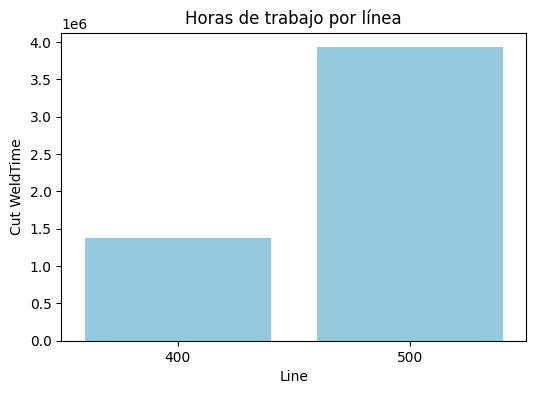

In [161]:
horas_trabajo = df_cleaned.groupby('Line')['Cut WeldTime'].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Line', y='Cut WeldTime', color='skyblue', data=horas_trabajo)
plt.title('Horas de trabajo por línea')
plt.show()


Una vez vista esta gráfica, se concluye que la línea 500 tiene un volumen de trabajo mayor, ya que el tiempo de corte supera con creces al de la línea 400. Esto nos da a entender que puede existir algún desajuste a lo largo de la línea o algún cuello de botella que ralentice la producción de los filtros.

## Conclusiones del análisis de datos para la optimización de las líneas de corte
A lo largo de este análisis de datos, se ha aplicado una combinación de técnicas analíticas en el comportamiento y la eficiencia de las líneas de corte 400 y 500 de una planta industrial. Este enfoque  ha permitido identificar factores que influyen en la calidad del corte y la consistencia del producto final. Se ha descubierto que ajustes como la velocidad de corte y la tensión del papel son esenciales para reducir variabilidades y mejorar el producto.

Durante el análisis de las líneas, se han detectado varias anomalías que contribuyen a paradas no planificadas y al aumento del desperdicio de material. Estas condiciones reducen la eficiencia de las líneas y elevan los costos operativos. Implementar un sistema de monitoreo en tiempo real podría ser beneficioso para detectar y prevenir estas anomalías antes de que impacten la producción.

A nivel personal, recomiendo la implementación de un sistema de ajuste dinámico que permita modificaciones en tiempo real de los parámetros críticos. Además, es importante formar al personal técnico en mantenimiento preventivo y operación, lo cual no solo mejorará la eficiencia y calidad de los cortes, sino que también prolongará la vida útil de los equipos empleados.

Ricardo Delgado Fernández - 21844773

Máster en Industria 4.0 Híbrido

Universidad Europea de Madrid